<a href="https://colab.research.google.com/github/Nghialego1306/test/blob/main/AIcuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#liên kết với gg drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv #thêm thư viện opencv
import numpy as np #thêm thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh
import matplotlib.pyplot as plt #thêm thư viện matplotlib

In [ ]:
from keras.preprocessing import  image
from keras.preprocessing.image import load_img,img_to_array
#đưa đường dẫn vào thư viện hình ảnh đã được up lên gg drive
dir_folder = '/content/drive/MyDrive/Data cá'
#tạo list chứa data và label
labels = []
x_train = []
y_train = []
path_img=[]
# tạo dữ liệu train
for i in os.listdir(dir_folder):
  path = os.path.join(dir_folder, i)
  labels.append(str(i))
  for j in os.listdir(path):
    path_img.append(os.path.join(path,j))
    y_train.append(labels.index(i))
    img = image.load_img(os.path.join(path, j), target_size=(200,200))
    img = img_to_array(img)
    img = img.reshape(200,200,3) 
    img = img.astype('float32')
    img = img/255
    x_train.append(img)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
x_train = np.array(x_train)
#chuyển list label thành dạng array 
y_train = np.array(y_train)

In [ ]:
x_train.shape

(349, 200, 200, 3)

In [ ]:
y_train.shape

(349,)

In [ ]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

9

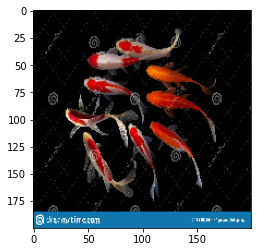

In [ ]:
plt.imshow(x_train[325])
y_train[325]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train =to_categorical(y_train,11)

In [ ]:
#xây dựng model cho việc training
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

model.add(Conv2D(filters=32,  kernel_size=(5,5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3),strides=2))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(filters=64,  kernel_size=(5,5),  activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(5,5),  activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dense(1028, activation='relu'))
model.add(Dense(1028, activation='relu'))

model.add(Dense(11, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 128)     

In [ ]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('Data cá.h5')

Epoch 1/100
5/5 [==============================] - 21s 4s/step - loss: 4.5568 - accuracy: 0.1146 - val_loss: 2.8663 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 15s 3s/step - loss: 2.3382 - accuracy: 0.1178 - val_loss: 4.3477 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 15s 3s/step - loss: 2.2729 - accuracy: 0.1561 - val_loss: 3.8934 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 15s 3s/step - loss: 2.1733 - accuracy: 0.2516 - val_loss: 4.3088 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 13s 3s/step - loss: 2.0674 - accuracy: 0.2898 - val_loss: 5.0183 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 17s 3s/step - loss: 1.9432 - accuracy: 0.3121 - val_loss: 5.0527 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 13s 3s/step - loss: 1.9012 - accuracy: 0.3344 - val_loss: 6.0789 - val_accuracy: 0.0000e+00

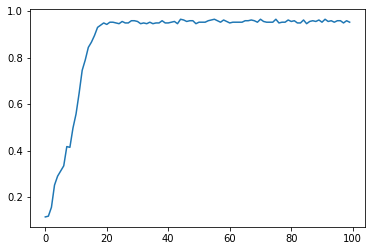

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
label = ['1','2','3','4','5','6','7','8','0','9','10']

7


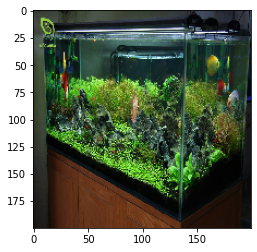

In [ ]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model5= load_model('Data cá.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary

#load ảnh resize 50x50
img= load_img('14.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

0


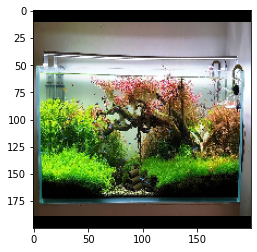

In [ ]:
#load ảnh resize 50x50
img= load_img('01.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

[[1.0000000e+00 1.8842878e-09 1.7160587e-10 7.3001621e-10 1.6082644e-10
  6.3430355e-10 1.8833050e-11 1.3843626e-10 1.6488708e-13 2.2265160e-11
  1.8223199e-20]]
1


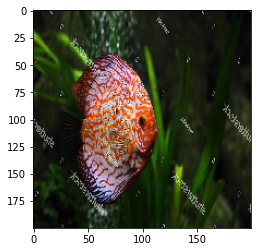

In [ ]:
result= model5.predict(x_train[50].reshape(-1,200,200,3))
print(result)
plt.imshow(x_train[50])
print(label[int(np.argmax(result,axis=1))])

1


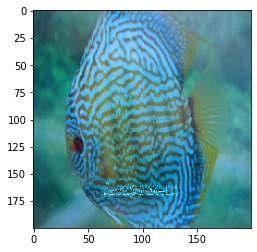

In [ ]:
#load ảnh resize 50x50
img= load_img('13.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

3


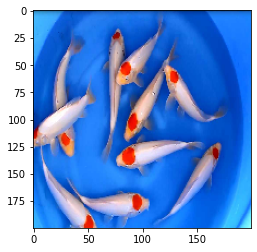

In [ ]:
#load ảnh resize 50x50
img= load_img('19.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
img= cv.GaussianBlur(img,(3,3),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])